### NetworkX e Gephi
Use o código abaixo em conjunto com o Gephi:
1. carregue o exemplo Les Miserables.gexf no Gephi
2. exporte no formato GML (miserables.gml) para carregar no notebook

Esta rede representa as interações dos personagens do romance de Victor Hugo.\
Compare alguns valores fornecidos pelo NetworkX com os disponíveis no Gephi

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import csv

hist = []
files = ['../excel/dados_historicos_alunos_de_EngComputacaoCuritiba desistentes mudancas curso.csv',
         '../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv',
         '../excel/dados_historicos_alunos_de_EngComputacaoCuritiba regulares.csv',
         '../excel/dados_historicos_alunos_de_EngComputacaoCuritiba trancados.csv']

for file in files:
    with open(file, 'r') as csvfile:   
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            hist.append(row)

In [2]:
G = nx.DiGraph()

# disciplinas 
for line in hist:
    if not G.has_node(line["CODIGO"]):
        G.add_node(line["CODIGO"] + "-" + line["ANO"] + "/" + line["PERIODO"])
G.nodes()

NodeView(('ES70R-2015/2', 'FI71M-2015/2', 'IF61C-2015/2', 'MA71B-2015/2', 'IF61B-2015/2', 'MA71A-2015/2', 'MA61A-2010/1', 'FI61A-2010/1', 'IF61C-2010/1', 'IF61B-2010/1', 'ES61A-2010/1', 'MA61B-2010/1', 'FI71M-2019/2', 'CSD20-2019/1', 'FI71M-2019/1', 'CSD20-2019/2', 'MA71A-2019/1', 'MA71B-2019/1', 'CSF13-2019/1', 'ENADE I-2019/2', 'MA71B-2019/2', 'MA71A-2019/2', 'MA61B-2012/1', 'IF66J-2012/1', 'FI62A-2012/1', 'FI63A-2012/1', 'MA63A-2012/1', 'EL63B-2012/1', 'EL65A-2012/1', 'IF64J-2012/1', 'MA63C-2012/1', 'MA61A-2012/1', 'ET77B-2012/1', 'ET75E-2012/1', 'QB70D-2012/1', 'ET75F-2012/1', 'QB70E-2012/1', 'QB60A-2012/1', 'ENADE I-2012/1', 'MA65A-2012/1', 'IF62J-2012/1', 'MA62A-2012/1', 'IF61C-2012/1', 'EL64H-2012/1', 'FI61A-2012/1', 'EL66C-2012/1', 'EL66H-2012/1', 'EL66D-2012/1', 'EL68G-2012/1', 'ES61A-2012/1', 'IF61B-2012/1', 'IF63C-2012/1', 'EL65G-2012/1', 'IF65C-2012/1', 'EL66I-2012/1', 'IF62C-2012/1', 'EL62A-2012/1', 'ES60A-2012/1', 'IF64C-2012/1', 'IF65E-2012/1', 'IF67D-2012/1', 'MA64A-201

In [3]:
print(G.number_of_nodes())

4379


In [4]:
j_init = 0
student = ""
for i in range(len(hist)-1):
    course = hist[i]["CODIGO"]
    year = int(hist[i]["ANO"])
    semester = int(hist[i]["PERIODO"])
    # começou a análise de outro estudante
    if (student != hist[i]["ID_ANONIMO"]):
        student = hist[i]["ID_ANONIMO"]
        j_init = i
    for j in range(j_init, len(hist)):
        # verificar se é o próximo período ainda do mesmo aluno
        if (student != hist[j]["ID_ANONIMO"]):
            break
        # cria a aresta/adiciona peso nela
        edge1 = course + "-" + str(year) + "/" + str(semester)
        edge2 = hist[j]["CODIGO"] + "-" + hist[j]["ANO"] + "/" + hist[j]["PERIODO"]
        if (semester == 1):
            # deve ser no mesmo ano e no 2o periodo
            if int(hist[j]["ANO"]) == year and int(hist[j]["PERIODO"]) == 2:
                if G.has_edge(edge1, edge2):
                    G[edge1][edge2]['weight'] += 1
                else:
                    G.add_edge(edge1, edge2, weight = 1) 
        else:
            # deve ser no próx ano e no 1o período
            if int(hist[j]["ANO"]) == year+1 and int(hist[j]["PERIODO"]) == 1:
                if G.has_edge(edge1, edge2):
                    G[edge1][edge2]['weight'] += 1
                else:
                    G.add_edge(edge1, edge2, weight = 1) 

In [5]:
print(G.number_of_edges())

122165


In [6]:
#nx.draw(G)

In [7]:
G.degree()

DiDegreeView({'ES70R-2015/2': 57, 'FI71M-2015/2': 104, 'IF61C-2015/2': 77, 'MA71B-2015/2': 86, 'IF61B-2015/2': 84, 'MA71A-2015/2': 58, 'MA61A-2010/1': 62, 'FI61A-2010/1': 59, 'IF61C-2010/1': 66, 'IF61B-2010/1': 79, 'ES61A-2010/1': 73, 'MA61B-2010/1': 56, 'FI71M-2019/2': 55, 'CSD20-2019/1': 57, 'FI71M-2019/1': 54, 'CSD20-2019/2': 59, 'MA71A-2019/1': 57, 'MA71B-2019/1': 82, 'CSF13-2019/1': 76, 'ENADE I-2019/2': 50, 'MA71B-2019/2': 95, 'MA71A-2019/2': 69, 'MA61B-2012/1': 112, 'IF66J-2012/1': 82, 'FI62A-2012/1': 120, 'FI63A-2012/1': 98, 'MA63A-2012/1': 114, 'EL63B-2012/1': 127, 'EL65A-2012/1': 117, 'IF64J-2012/1': 90, 'MA63C-2012/1': 95, 'MA61A-2012/1': 90, 'ET77B-2012/1': 0, 'ET75E-2012/1': 0, 'QB70D-2012/1': 104, 'ET75F-2012/1': 11, 'QB70E-2012/1': 158, 'QB60A-2012/1': 155, 'ENADE I-2012/1': 102, 'MA65A-2012/1': 132, 'IF62J-2012/1': 100, 'MA62A-2012/1': 97, 'IF61C-2012/1': 104, 'EL64H-2012/1': 109, 'FI61A-2012/1': 111, 'EL66C-2012/1': 120, 'EL66H-2012/1': 94, 'EL66D-2012/1': 106, 'EL68G-

Text(0, 0.5, 'Numero de nós')

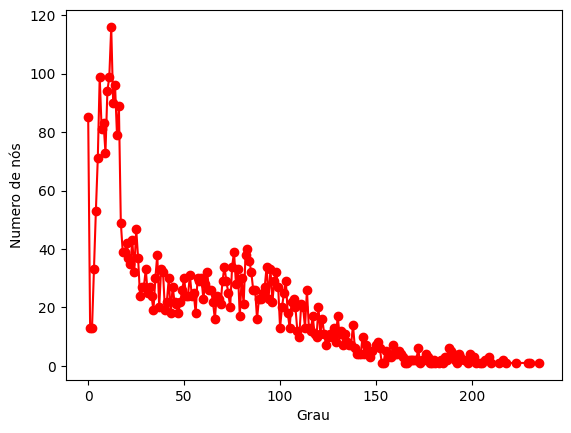

In [8]:
dicDegree = dict(G.degree() )
valores = sorted(set(dicDegree.values()))
valores

hist = [list(dicDegree.values()).count(x) for x in valores]

plt.plot(valores, hist, 'ro-') 

plt.xlabel('Grau')
plt.ylabel('Numero de nós')

In [9]:
nx.write_gexf(G, "grafo_caminho_temporal.gexf")